<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; padding-bottom: 20px; border-radius: 10px;">
 
<center>    
    <h1><b>KNN Model</b></h1>
    <h2>Diabetes dataset</h2>
</center>  
    
<br>
<br>
    
<div style="background-color: white; padding: 20px; border-radius: 10px; width: 60%; margin-left: 20%; opacity: 1.3;">
    <img src="knn.png">
</div>    
    
</div>

In [185]:
library(class)       # KNN model
library(caTools)     # divide yesy and train sets
library(psych)       # Graph
library(ggplot2)     # Visualization

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> 1. Introduction <h1></center>
</div>    

In this notebook I will implement an <b>K-Nearest Neighbors</b> algorithm. <b>KNN</b> algorithm was created by Evelyn Fix and Joseph Hodges in 1951, it can be used for both regression and classification problems. In this example I will be using KNN for classification, since the problem consists on determining whether a person has diabetes or not. The data set in use is "diabetes.csv". This csv file contains medical information related with the diabetes desiese, the variables that compose it are the following: 

<ul style="margin-left: 20px;">
    <li><b>Pregnancies</b> - Number of pregnancies;</li>
    <li><b>Glucose</b> - Glucose levels on blood;</li>
    <li><b>BloodPressure</b> -  Diastolic blood pressure (mm Hg);</li>
    <li><b>SkinThickness</b> - Skin Thickness (mm);</li>
    <li><b>Insulin</b> - Insulin level on blood;</li>
    <li><b>BMI</b> - Body Mass Index (weight in kg/(height in m)2);</li>
    <li><b>DiabetesPedigreeFunction - </b></li>
    <li><b>Age</b> - Age of the individual in years;</li>
    <li><b>Outcome</b> - Boolean variable reflecting the existance of diabetes in each individual;</li>
</ul>

Link to dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> 2. Structure <h1></center>
</div>    

In [186]:
# import dataset
diabetes = read.csv("diabetes.csv")

In [187]:
# first five observations
head(diabetes, n=5)

# number of observations
nrow(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


[1] 768

In [188]:
data.frame(measure =c("Min", "Max", "Median", "Mean"),
           Pregnancies = c(0, 17, 3, 3.485),
           Glucose = c(0, 199, 117, 120.9),
           BloodPressure = c(0, 122, 72, 69.11),
           SkinThickness = c(0, 99, 23, 20.54),
           Insulin = c(0, 846, 30.5, 79.8),
           BMI = c(0, 67.10, 32, 31.99),
           DiabetesPedigreeFunction = c(0.078, 242, 0.3725, 0.4719),
           Age = c(21, 81, 29, 33.24),
           Outcome = c(0,1,0,0.349))

measure,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,0.000,0.0,0.00,0.00,0.0,0.00,0.0780,21.00,0.000
Max,17.000,199.0,122.00,99.00,846.0,67.10,242.0000,81.00,1.000
Median,3.000,117.0,72.00,23.00,30.5,32.00,0.3725,29.00,0.000
Mean,3.485,120.9,69.11,20.54,79.8,31.99,0.4719,33.24,0.349


This dataset has 9 variables, 7 integer and 2 double. The `Outcome` is the target variable, with `1` representing that the observed person has diabetes. We can see that 34.9% of the observations have `Outcome = 1`. All the other variables have different scales. Lets look at some of this variables through visualization.

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> 3. Visualization <h1></center>
</div>    

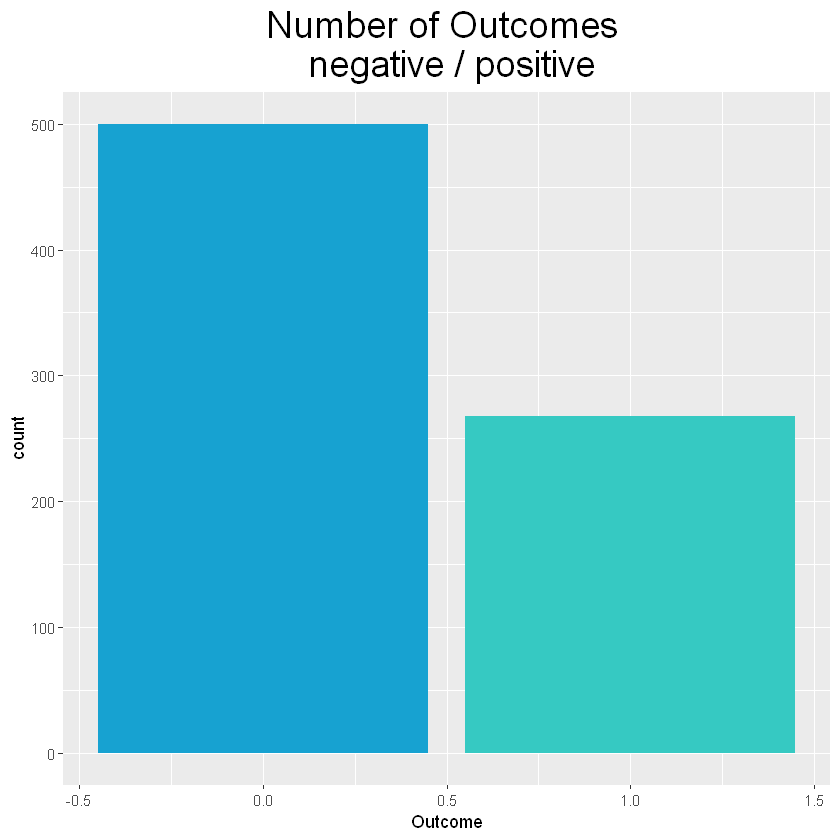

In [189]:
ggplot(diabetes, aes(x=Outcome)) +
  geom_bar(fill=c("#17a2d1","#36c9c2")) + 
  ggtitle("Number of Outcomes \n negative / positive") + 
  theme(plot.title = element_text(size=22)) + 
  theme(plot.title = element_text(hjust = 0.5))

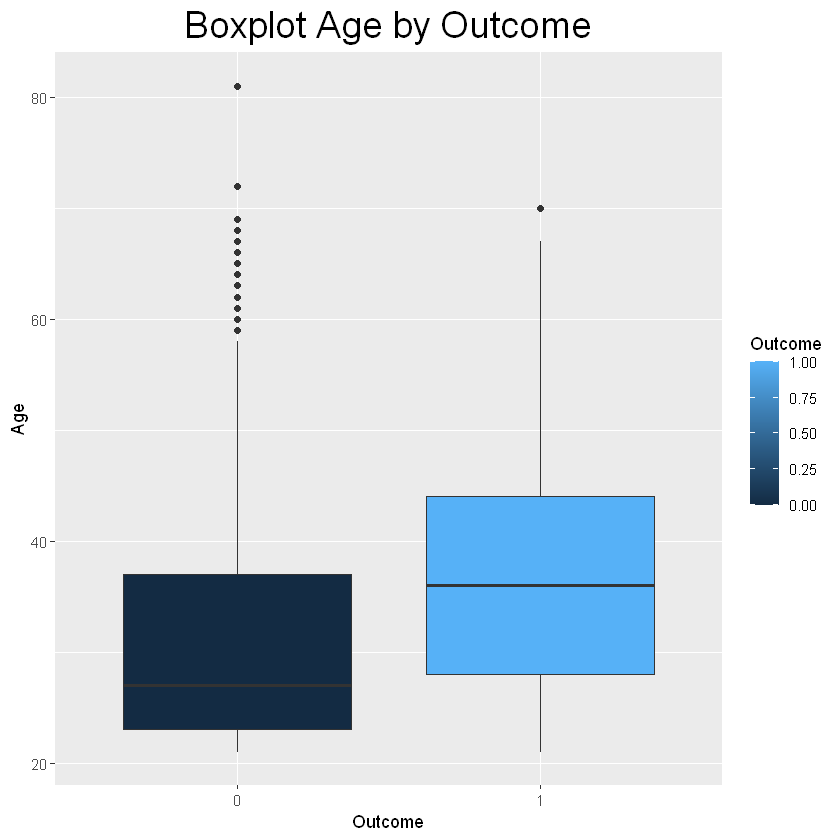

In [190]:
ggplot(diabetes, aes(x=as.factor(Outcome), y=Age, fill=Outcome)) +
    geom_boxplot() + 
    ggtitle("Boxplot Age by Outcome") + 
    xlab("Outcome") + 
    theme(plot.title = element_text(size=22)) + 
    theme(plot.title = element_text(hjust = 0.5))

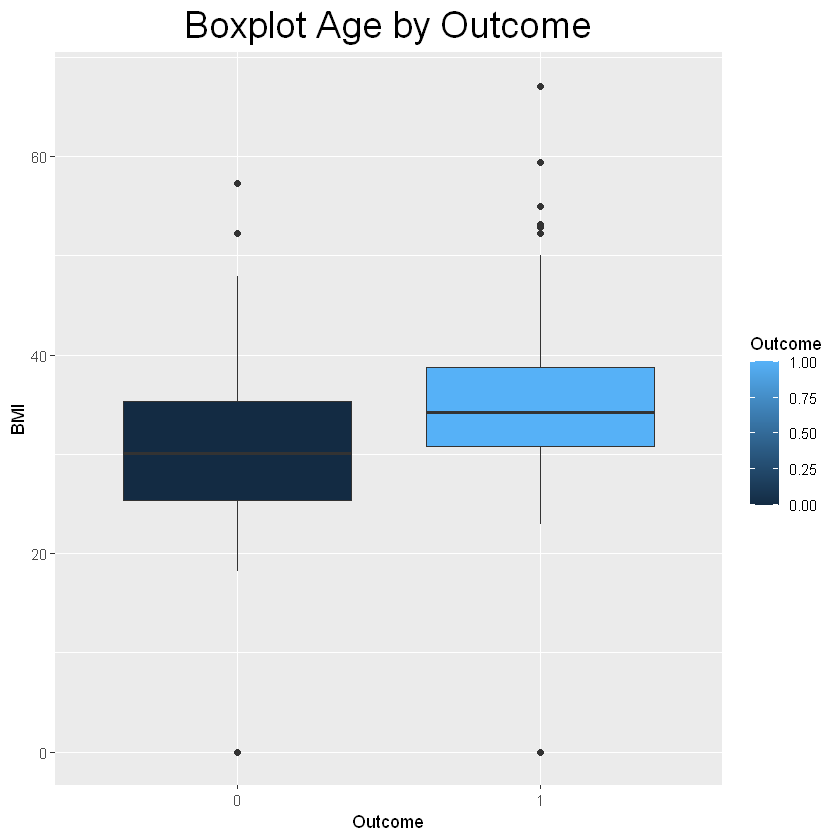

In [191]:
ggplot(diabetes, aes(x=as.factor(Outcome), y=BMI, fill=Outcome)) +
    geom_boxplot() + 
    ggtitle("Boxplot Age by Outcome") + 
    xlab("Outcome") + 
    theme(plot.title = element_text(size=22)) + 
    theme(plot.title = element_text(hjust = 0.5))

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> 4. Data Cleaning <h1></center>
</div>    

In [192]:
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

### 4.1 Finding MissingValues:

In this section we are going to prepare our data for the algorithm. The first step is to find all values that are wrong, as we saw before there are variables that cannot be zero, but have some obsevations with that value. It means that zero is not actually a value, but a <b>NA code</b>. This variables are: `Glucose`, `BoolPressure`, `SkinThickness` and `BMI`. For each one of this lets count the number of missvalues.

In [193]:
# It is know that glucose levels below 40mg is letal, because the brain cant work with such low levels. As we can 
# see below, there are 5 observarions with this variable = 0, lets replace the 0 with the mean for this variable.

nrow(diabetes[diabetes$Glucose <  40,])
nrow(diabetes[diabetes$Glucose <  40,]) / nrow(diabetes) * 100

[1] 5

[1] 0.6510417

In [194]:
# There were 35 observations with bloodpressure = 0, which is impossible.

nrow(diabetes[diabetes$BloodPressure == 0,])
nrow(diabetes[diabetes$BloodPressure == 0,]) / nrow(diabetes) * 100

[1] 35

[1] 4.557292

In [195]:
# As we can see bellow, more that 25% of the observations have a zero value for SkinThickness. Given the dimension
# of this missingvalues it is not prudent to change them by the mean of the SkinThickness variable. But there is 
# something better we can do, we can run a linear regression algorithm to predict this missingvalues

nrow(diabetes[diabetes$SkinThickness == 0,])
nrow(diabetes[diabetes$SkinThickness == 0,]) / nrow(diabetes) * 100

[1] 227

[1] 29.55729

In [196]:
# This variable represent the Body Mass Index, which can't be zero, we are going to use the mean method.

nrow(diabetes[diabetes$BMI == 0,])
nrow(diabetes[diabetes$BMI == 0,]) / nrow(diabetes) * 100

[1] 11

[1] 1.432292

In [197]:
data.frame(Variable = c("NA %"), 
           Glucose = c("0,7%"), 
           BloodPressure = c("4,6%"), 
           SkinThickness = c("29.6%"), 
           BMI = c("1.43%"))

Variable,Glucose,BloodPressure,SkinThickness,BMI
<chr>,<chr>,<chr>,<chr>,<chr>
NA %,"0,7%","4,6%",29.6%,1.43%


The `SkinThickness` variable has to many missvalues (29,6%), so it would be unprudent for me to change all those values with the mean. Instead we can create a linear regression model that based on all the other variables can predict the value of the `SkinThickness`. For that, I am going to create a set with all observations that have `SkinThickness` equal to zero and another one with the remaining observations, that I will use as input for my model.

### 4.2 Linear Regression model to predict SkinThickness MissingValues

In [198]:
# Data frame with missvalues
missvalues = diabetes[diabetes$SkinThickness==0,]

# Data frame with valid values
regression_input = diabetes[!diabetes$SkinThickness==0,]

In [199]:
# For this model I am going to use two variables to predict the target (BMI, Age)
lr1 = lm(SkinThickness ~ BMI + Age, data=regression_input)

summary(lr1)


Call:
lm(formula = SkinThickness ~ BMI + Age, data = regression_input)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.353  -5.072  -0.719   4.992  64.893 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.04363    1.84620  -2.190  0.02894 *  
BMI          0.91175    0.04875  18.703  < 2e-16 ***
Age          0.10506    0.03242   3.241  0.00127 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.057 on 538 degrees of freedom
Multiple R-squared:  0.4109,	Adjusted R-squared:  0.4087 
F-statistic: 187.6 on 2 and 538 DF,  p-value: < 2.2e-16


In [200]:
# vector with predicted values for SkinThikness
predict_SkinThickness = predict(lr1, missvalues)

In [201]:
# insert predicted values on dataframe
diabetes$SkinThickness[diabetes$SkinThickness==0] = predict_SkinThickness

# Count number of zeros
sum(nrow(diabetes[diabetes$SkinThickness == 0,]))

[1] 0

For the other variables I am going to use anothor method, I will replace all their missvalues with their mean, since the number of NA's is so reduced.

### 4.3 Replace MissingValues with mean

In [202]:
# Replace zeros with mean
diabetes$Glucose[diabetes$Glucose == 0] = mean(diabetes$Glucose)

# Count number of zeros
sum(nrow(diabetes[diabetes$Glucose == 0,]))

[1] 0

In [203]:
# Replace zeros with mean
diabetes$BloodPressure[diabetes$BloodPressure == 0] = mean(diabetes$BloodPressure)

# Count number of zeros
nrow(diabetes[diabetes$BloodPressure == 0,])

[1] 0

In [204]:
# Replace zeros with mean
diabetes$BMI[diabetes$BMI == 0] = mean(diabetes$BloodPressure)

# Count number of zeros
nrow(diabetes[diabetes$BMI == 0,])

[1] 0

### 4.4 Normalization of the data

kNN algorithm uses the concept of distance to predict the target variable. The idea behind this algorithm is that points that are near each other are similar, so the algorithm clusters points of data by it's similarity. The eclidean's distance calculates the distance based on the scale of each variable, for that reason, if we don't want to influence the model, we must normalize the dataset before advancing with the model. To normalize a our data we can use the following formula:
<br>
<br>
$$
normalize = \frac{x \ - \ min(x)}{max(x) \ - \ min(x)}
$$

In [205]:
# create function to normalize values
normalize = function(x) {
    x = (x - min(x)) / (max(x) - min(x))
}

In [206]:
for (i in 1:8) {
    diabetes[i] = normalize(diabetes[i])
}

head(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.35294118,0.6709677,0.4897959,0.3653152,0.0000000,0.28489603,0.23441503,0.4833333,1
2,0.05882353,0.2645161,0.4285714,0.3058135,0.0000000,0.15539784,0.11656704,0.1666667,0
3,0.47058824,0.8967742,0.4081633,0.2221327,0.0000000,0.09434869,0.25362938,0.1833333,1
4,0.05882353,0.2903226,0.4285714,0.2463118,0.1111111,0.18314745,0.03800171,0.0000000,0
5,0.00000000,0.6000000,0.1632653,0.3653152,0.1985816,0.46064359,0.94363792,0.2000000,1
6,0.29411765,0.4645161,0.5102041,0.2408450,0.0000000,0.13689809,0.05251921,0.1500000,0


In [207]:
summary(diabetes)

  Pregnancies         Glucose       BloodPressure    SkinThickness   
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.05882   1st Qu.:0.3597   1st Qu.:0.4082   1st Qu.:0.2364  
 Median :0.17647   Median :0.4710   Median :0.4898   Median :0.2994  
 Mean   :0.22618   Mean   :0.5012   Mean   :0.4924   Mean   :0.3020  
 3rd Qu.:0.35294   3rd Qu.:0.6210   3rd Qu.:0.5714   3rd Qu.:0.3653  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    Insulin             BMI         DiabetesPedigreeFunction      Age        
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000          Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.1720   1st Qu.:0.07077          1st Qu.:0.0500  
 Median :0.03605   Median :0.2627   Median :0.12575          Median :0.1333  
 Mean   :0.09433   Mean   :0.2743   Mean   :0.16818          Mean   :0.2040  
 3rd Qu.:0.15041   3rd Qu.:0.3446   3rd Qu.:0.23409          3rd Qu.:0.3333  
 Max.   :1.00000   Max.   :1.0000   Max.  

Now our data is ready for the kNN algorithm, so far we've replaced missingvalues and normalized the dataframe, now it's time to create a test and a train set.

###  4.5 Train and Test set    

In [208]:
# Sample split diabetes

set.seed(1)    # so the partition is always the same

train = sample.split(diabetes, SplitRatio=0.9)

In [209]:
# Train set for KNN model
training_set = diabetes[train,-c(9)]

# Test set for prediction
test_set = diabetes[!train,-c(9)]

In [210]:
# Train set labels for KNN model
train_labels = diabetes[train, 9]

# Test set labels for prediction
test_labels = diabetes[!train,9]

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> 5. Data Modeling <h1></center>
</div>    

To model the data we can use the function knn() from the class package. For input this function needs the training set, the test set, the labels of the training data and the number of k. For now we will try running the model with k = {1, 10, 20}, to have an idea about the optimum K.

In [211]:
knn1 = knn(train = training_set, test = test_set, cl = train_labels, k = 1)

# accuracy
sum(diag(table(knn1, test_labels))) / sum(table(knn1, test_labels))

[1] 0.6470588

In [212]:
knn10 = knn(train = training_set, test = test_set, cl = train_labels, k = 10)

# accuracy
sum(diag(table(knn10, test_labels))) / sum(table(knn10, test_labels))

[1] 0.7294118

In [213]:
knn20 = knn(train = training_set, test = test_set, cl = train_labels, k = 20)

# accuracy
sum(diag(table(knn20, test_labels))) / sum(table(knn20, test_labels))

[1] 0.7647059

As we can see, if the value of k is incremented the accuracy of the model grows. The code above will run the kNN algorithm using different values of K (from 1 to 200), in order to understand which is the best K for this problem. 

In [214]:
set.seed(1)
accuracy = c()

for (k in c(1:200)) {
    knn = knn(train = training_set, test = test_set, cl = train_labels, k = k)
    confusion_m = table(knn, test_labels)
    accuracy[k] = sum(diag(confusion_m) / sum(confusion_m))
}

In [215]:
graph = data.frame(x = c(1:200), y = accuracy)

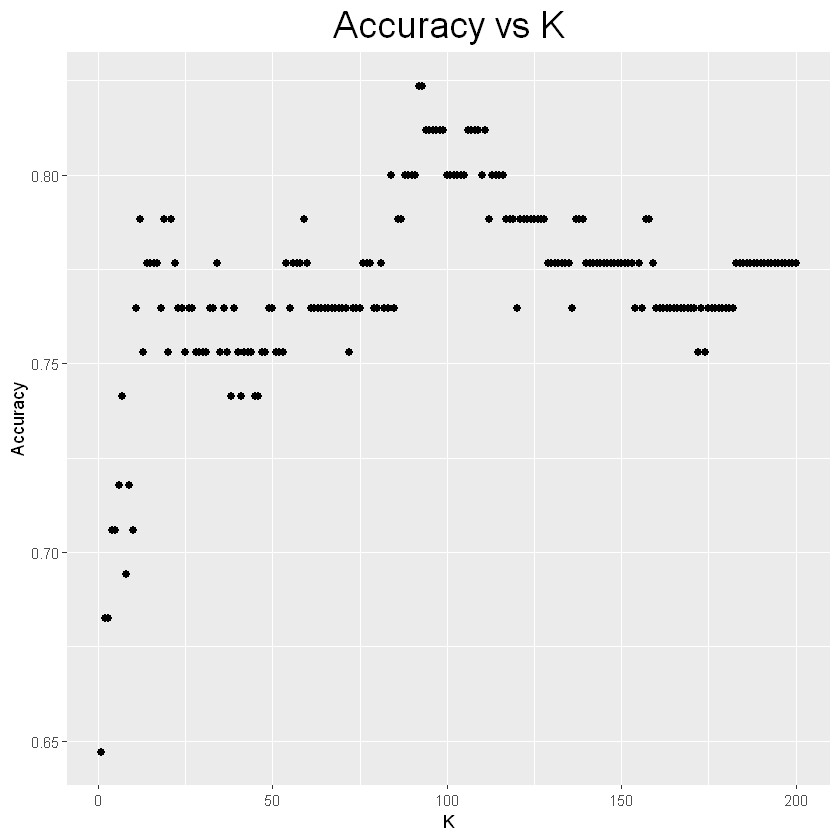

In [216]:
ggplot(graph, aes(x=x, y=y)) +
  geom_point(size=2) + 
  xlab("K") + 
  ylab("Accuracy") + 
  ggtitle("Accuracy vs K") + 
  theme(plot.title = element_text(size=22)) + 
  theme(plot.title = element_text(hjust = 0.5))

In [217]:
which.max(accuracy)
max(accuracy)

[1] 92

[1] 0.8235294

According to the graph the K that minimizes the errors is 92 or 93, with an accuracy of 82.6%. Now we will look at some metrics to evaluate the preformance of the model.

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> 6. Prediction Metrics <h1></center>
</div>    

In [218]:
set.seed(1)

knn93 = knn(train = training_set, test = test_set, cl = train_labels, k = 93)

In [219]:
confusion_m = table(knn93, test_labels)
confusion_m

     test_labels
knn93  0  1
    0 54 13
    1  2 16

In [220]:
accuracy = sum(diag(confusion_m)) / sum(confusion_m)
accuracy

[1] 0.8235294

In [221]:
# proportion of missclassified values
missclassified = 1 - (sum(diag(confusion_m)) / sum(confusion_m))
missclassified

[1] 0.1764706

In [222]:
# precision prediction people without diabetes
precision_0 = confusion_m[1,1] / sum(confusion_m[,1])
precision_0

[1] 0.9642857

In [223]:
# precision prediction people with diabetes
precision_1 = confusion_m[2,2] / sum(confusion_m[,2])
precision_1

[1] 0.5517241

In [224]:
# proportion of right classifications for 0
precision_1 = confusion_m[1,1] / sum(confusion_m[1,])
precision_1

[1] 0.8059701

In [225]:
# proportion of right classifications for 1
precision_1 = confusion_m[2,2] / sum(confusion_m[2,])
precision_1

[1] 0.8888889

In this notebook we created a model that predicts with 82,4% accuracy if a person has or not diabetes. By looking at the `confusion_m` we realize that out model has a very high accuracy (96,4%) when predicting observations with Outcome equal to zero. On the other hand, the model accuracy for observations with Outcome equal to 1 is 55,2%. In conclusion or KNN model has a better performance precting Outcome=0 that Outcome=1. Given that, this model could be used as a double check to make sure that an individual doesn't have diabetes.

<div style="background-color: #03d7fc; opacity: 0.7; color: white; padding-top: 20px; border-radius: 10px;">
<center><h1> Thank you for reading! <h1></center>
</div>    